# Modeling

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
mvp_df = pd.read_csv('./data/dirty_mvp.csv')
mvp_df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
#Train Test Split
X = mvp_df['title']
y = mvp_df['subreddit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [4]:
#Pipeline
mvp_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

In [5]:
cross_val_score(mvp_pipe,X_train,y_train).mean()

0.7613333333333334

In [6]:
mvp_pipe.fit(X_train,y_train)
print(f'The Train Score: {mvp_pipe.score(X_train,y_train)}')
print(f'The Test Core: {mvp_pipe.score(X_test,y_test)}')

The Train Score: 0.9193333333333333
The Test Core: 0.798


We can see from the comparison of the two scores that our model is overfit. We can add more features to increase bias, but overall we can be satisfied with this MVP.

In [7]:
#Get Predictions
mvp_preds = mvp_pipe.predict(X_test)

<ipython-input-8-b2a44bf34473>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-8-b2a44bf34473>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


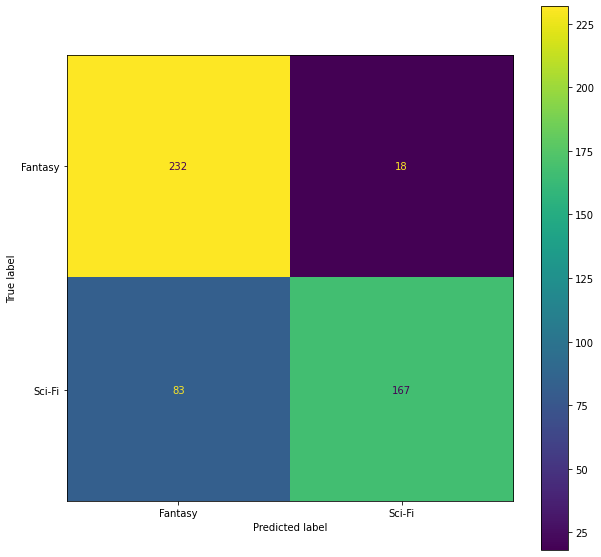

In [8]:
#Confusion Matrix
cm = confusion_matrix(y_test,mvp_preds)
tn,fp,fn,tp = cm.ravel()

labels = ['Fantasy','Sci-Fi']

cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
cmp.plot(ax=ax);
plt.show();

 Our next step is to hypertune our parameters to product a better model.

In [9]:
pipe_params = {
    'cvec__max_features':[3_000,4_000,5_000], #Capping features at 3,000/4,000/5,000 words
    'cvec__min_df':[2,3,4,5,6], #Minimum documents required to contain a word
    'cvec__ngram_range':[(1,1),(1,2),(1,3),(1,4)] #Checking individual words as well as word pairs
}

In [10]:
mvp_gs = GridSearchCV(mvp_pipe, param_grid=pipe_params,cv=5)

In [11]:
mvp_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [2, 3, 4, 5, 6],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]})

In [12]:
print(f'The Train Score: {mvp_gs.score(X_train,y_train)}')
print(f'The Test Score: {mvp_gs.score(X_test,y_test)}')
print(f'Best Parameters: {mvp_gs.best_params_}')

The Train Score: 0.8426666666666667
The Test Score: 0.796
Best Parameters: {'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}


<ipython-input-13-2cacc95f30a7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-13-2cacc95f30a7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


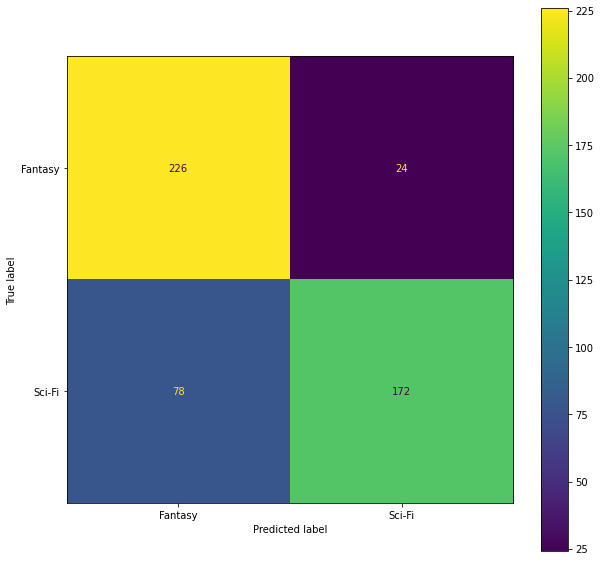

In [13]:
#Confusion Matrix
cm = confusion_matrix(y_test,mvp_gs.predict(X_test))
tn,fp,fn,tp = cm.ravel()

labels = ['Fantasy','Sci-Fi']

cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
cmp.plot(ax=ax);
plt.show();

Our gridsearch improved our model's ability to accurately classify Sci-Fi posts!